<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preamble" data-toc-modified-id="Preamble-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preamble</a></span><ul class="toc-item"><li><span><a href="#Functions" data-toc-modified-id="Functions-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Functions</a></span></li><li><span><a href="#Two-traces" data-toc-modified-id="Two-traces-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Two traces</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Colors" data-toc-modified-id="Colors-1.2.0.1"><span class="toc-item-num">1.2.0.1&nbsp;&nbsp;</span>Colors</a></span></li><li><span><a href="#First-attempt" data-toc-modified-id="First-attempt-1.2.0.2"><span class="toc-item-num">1.2.0.2&nbsp;&nbsp;</span>First attempt</a></span></li><li><span><a href="#Third-attempt" data-toc-modified-id="Third-attempt-1.2.0.3"><span class="toc-item-num">1.2.0.3&nbsp;&nbsp;</span>Third attempt</a></span></li><li><span><a href="#Depicting-the-input" data-toc-modified-id="Depicting-the-input-1.2.0.4"><span class="toc-item-num">1.2.0.4&nbsp;&nbsp;</span>Depicting the input</a></span></li></ul></li></ul></li></ul></li></ul></div>

# Preamble

In [1]:
import  pprint
import  subprocess 
import sys 
sys.path.append('../')

import numpy as np
import scipy as sp
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

%matplotlib inline

np.set_printoptions(suppress=True, precision=5)

from network import Protocol, NetworkManager, Network
from patterns_representation import PatternsRepresentation
from analysis_functions import calculate_persistence_time, calculate_recall_quantities, calculate_triad_connectivity
from plotting_functions import plot_weight_matrix, plot_network_activity_angle, plot_persistent_matrix

In [2]:
epsilon = 10e-10
vmin = -3.0
remove = 0.010

strict_maximum = True

dt = 0.001
tau_s = 0.010
tau_a = 0.250
g_I = 2.0
g_a = 2.0
G = 50.0

sns.set(font_scale=3.5)
sns.set_style("whitegrid", {'axes.grid': False})
plt.rcParams['figure.figsize'] = (12, 8)
lw = 10
ms = 22
alpha_graph = 0.3
colors = sns.color_palette()

## Functions

## Two traces

In [3]:
sigma_out = 0.0
tau_z_pre = 0.050
tau_z_post = 0.015

hypercolumns = 1
minicolumns = 5
n_patterns = minicolumns


# Training protocol
training_times_base = 0.100
training_times = [training_times_base for i in range(n_patterns)]
ipi_base = 0.010
inter_pulse_intervals = [ipi_base for i in range(n_patterns)]
inter_sequence_interval = 0
resting_time = 0.0
epochs = 1
T_persistence = 0.100

# Manager properties
values_to_save = ['o']


# Neural Network
nn = Network(hypercolumns, minicolumns, G=G, tau_s=tau_s, tau_z_pre=tau_z_pre, tau_z_post=tau_z_post,
                 tau_a=tau_a, g_a=g_a, g_I=g_I, sigma_out=sigma_out, epsilon=epsilon, prng=np.random,
                 strict_maximum=strict_maximum, perfect=False, normalized_currents=True)


# Build the manager
manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

# Build the representation
representation = PatternsRepresentation(manager.canonical_activity_representation, minicolumns=minicolumns)


# Build the protocol
protocol = Protocol()
protocol.simple_protocol(representation, training_times=training_times, inter_pulse_intervals=inter_pulse_intervals,
                    inter_sequence_interval=inter_sequence_interval, epochs=epochs, resting_time=resting_time)

# Run the protocol
timed_input = manager.run_network_protocol_offline(protocol=protocol)
# Set the persistent time
manager.set_persistent_time_with_adaptation_gain(T_persistence=T_persistence, from_state=1, to_state=2)

1.4290915687148107

In [ ]:
o_set = timed_input.O.T
z_set = timed_input.z_pre.T
z_set_post = timed_input.z_post.T

#### Colors

In [ ]:
# Blue and red
color_pre_to_post = 'blue'
color_post_to_pre = 'red'
# Blue and orange
color_pre_to_post = '#0343df'
color_post_to_pre = '#f97306'
# Purple to yellow
color_pre_to_post = '#9a0eea'
color_post_to_pre = '#ffff14'
# chartreuse and magenta
color_pre_to_post = '#c1f80a'
color_post_to_pre = '#c20078'

# Red and green
color_pre_to_post = '#8f1402'
color_post_to_pre = '#06470c'

#### First attempt

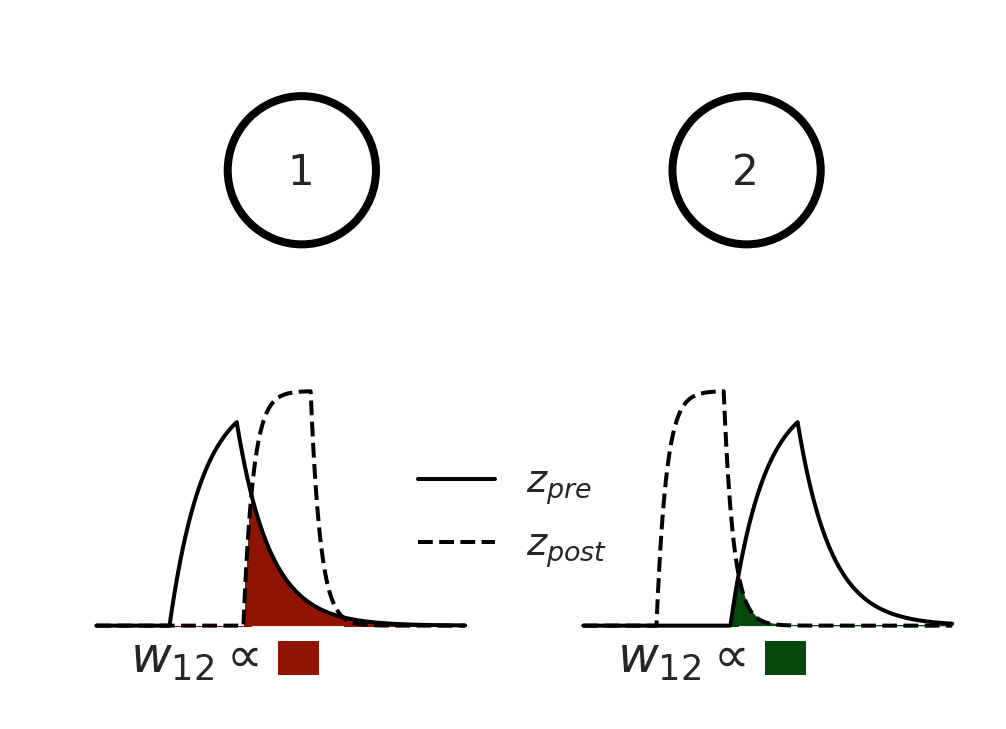

In [64]:
save = True
linewidth = 4
time = np.arange(0, manager.T_training_total, dt)
gs = gridspec.GridSpec(2, 2)



fig = plt.figure(figsize=(16, 12))

ax_diagram = fig.add_subplot(gs[0, :])
# The circles
first_point = -0.25
radius = 0.25
x1 = first_point
x2 = first_point + 6 * radius
y = 0.5
circle1 = plt.Circle((x1, y), radius, lw=8, color='black', alpha=1, fill=False)
circle2 = plt.Circle((x2, y), radius, lw=8, color='black', alpha=1, fill=False)
ax_diagram.add_patch(circle1)
ax_diagram.add_patch(circle2)
off_x = 0.05
ax_diagram.text(x1 -off_x, y - off_x, s='1')
ax_diagram.text(x2 -off_x, y - off_x, s='2')



#ax_diagram.set_xlim([-1, 1])
#ax_diagram.set_ylim([0, 1])
ax_diagram.set_aspect('equal', adjustable='datalim')
### The traces
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[1, 1])

# Plot the traces at 1
z_pre = z_set[:, 1]
z_post = z_set_post[:, 2]
ax1.plot(time, z_pre, linewidth=linewidth,  ls='-', color='black', label=r'$z_{pre}$')
ax1.plot(time, z_post, linewidth=linewidth, ls='--', color='black', label=r'$z_{post}$')

# Fill the gap
y1 = z_pre
y2 = z_post
ax1.fill_between(time, y1, 0, where=y1 <= y2 + 0.03, interpolate=True, step='post', 
                 color=color_pre_to_post, hatch='--')
ax1.fill_between(time, y2, 0, where=y2 <= y1, interpolate=True, step='post',
                 color=color_pre_to_post, hatch='--')


# Plot the traces at 2
z_pre = z_set[:, 2]
z_post = z_set_post[:, 1]
ax2.plot(time, z_pre, linewidth=linewidth, ls='-', color='black', label=r'$z_{pre}$')
ax2.plot(time, z_post, linewidth=linewidth, ls='--', color='black', label=r'$z_{post}$')



ax1.legend(frameon=False, loc=(0.8, 0.3))

# Fill the gap
y1 = z_pre
y2 = z_post
ax2.fill_between(time, y1, 0, where=y1 <= y2 , interpolate=True, step='post', color=color_post_to_pre)
ax2.fill_between(time, y2, 0, where=y2 <= y1, interpolate=True, step='post', color=color_post_to_pre)

x_text = 0.05
ax1.text(x_text, -0.2, s=r'$w_{12} \propto$', fontsize=50)
ax2.text(x_text, -0.2, s=r'$w_{12} \propto $', fontsize=50)
ax1.plot([x_text + 0.25], [-0.15], 's', ms=40, color=color_pre_to_post)
ax2.plot([x_text + 0.25], [-0.15], 's', ms=40, color=color_post_to_pre)



if True:
    ax1.axis('off')
    ax2.axis('off')
    ax_diagram.axis('off')
    
if save:
    directory = '../plot_producers/'
    file_name = 'association_diagram' 
    format_string = '.svg'
    string_to_save = directory + file_name + format_string
    fig.savefig(string_to_save, frameon=False, dpi=110, bbox_inches='tight')

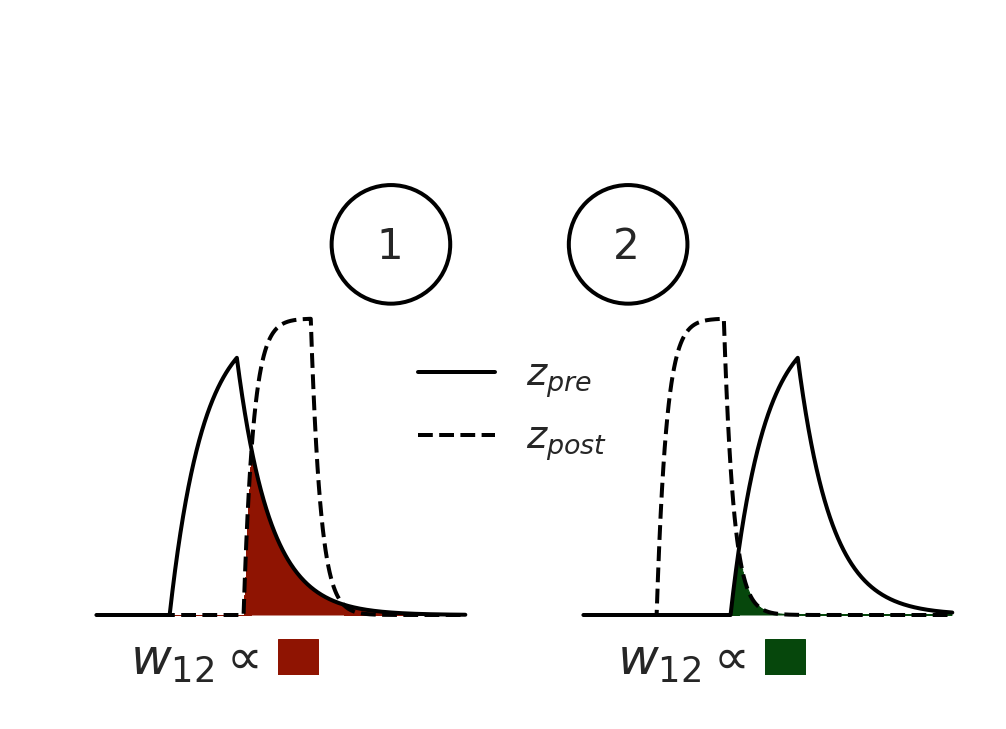

In [125]:
save = True
linewidth = 4
time = np.arange(0, manager.T_training_total, dt)
gs = gridspec.GridSpec(2, 2)



fig = plt.figure(figsize=(16, 12))

ax_diagram = fig.add_subplot(gs[0, :])
# The circles
first_point = 0.05
radius = 0.20
x1 = first_point
x2 = first_point + 4 * radius
y = 0.25
circle1 = plt.Circle((x1, y), radius, lw=4, color='black', alpha=1, fill=False)
circle2 = plt.Circle((x2, y), radius, lw=4, color='black', alpha=1, fill=False)
ax_diagram.add_patch(circle1)
ax_diagram.add_patch(circle2)
off_x = 0.05
ax_diagram.text(x1 -off_x, y - off_x, s='1')
ax_diagram.text(x2 -off_x, y - off_x, s='2')



#ax_diagram.set_xlim([-1, 1])
#ax_diagram.set_ylim([0, 1])
ax_diagram.set_aspect('equal', adjustable='datalim')
### The traces
ax1 = fig.add_subplot(gs[:, 0])
ax2 = fig.add_subplot(gs[:, 1])

# Plot the traces at 1
z_pre = z_set[:, 1]
z_post = z_set_post[:, 2]
ax1.plot(time, z_pre, linewidth=linewidth,  ls='-', color='black', label=r'$z_{pre}$')
ax1.plot(time, z_post, linewidth=linewidth, ls='--', color='black', label=r'$z_{post}$')

# Fill the gap
y1 = z_pre
y2 = z_post
ax1.fill_between(time, y1, 0, where=y1 <= y2 + 0.03, interpolate=True, step='post', 
                 color=color_pre_to_post, hatch='--')
ax1.fill_between(time, y2, 0, where=y2 <= y1, interpolate=True, step='post',
                 color=color_pre_to_post, hatch='--')


# Plot the traces at 2
z_pre = z_set[:, 2]
z_post = z_set_post[:, 1]
ax2.plot(time, z_pre, linewidth=linewidth, ls='-', color='black', label=r'$z_{pre}$')
ax2.plot(time, z_post, linewidth=linewidth, ls='--', color='black', label=r'$z_{post}$')



ax1.legend(frameon=False, loc=(0.8, 0.3))

# Fill the gap
y1 = z_pre
y2 = z_post
aux = (y2  > 0 ) * (y1 < y2)
ax2.fill_between(time, y1, 0, where=y1 <= y2 , interpolate=True, step='post', color=color_post_to_pre)
ax2.fill_between(time, y2, 0, where=y2 <= y1, interpolate=True, step='post', color=color_post_to_pre)

x_text = 0.05
ax1.text(x_text, -0.2, s=r'$w_{12} \propto$', fontsize=50)
ax2.text(x_text, -0.2, s=r'$w_{12} \propto $', fontsize=50)
ax1.plot([x_text + 0.25], [-0.15], 's', ms=40, color=color_pre_to_post)
ax2.plot([x_text + 0.25], [-0.15], 's', ms=40, color=color_post_to_pre)

ax1.set_ylim([-0.20, 2.0])
ax2.set_ylim([-0.20, 2.0])


if True:
    ax1.axis('off')
    ax2.axis('off')
    ax_diagram.axis('off')
    
if save:
    directory = '../plot_producers/'
    file_name = 'association_diagram2' 
    format_string = '.svg'
    string_to_save = directory + file_name + format_string
    fig.savefig(string_to_save, frameon=False, dpi=110, bbox_inches='tight')

#### Third attempt
Use circles in plot instead of circles patches

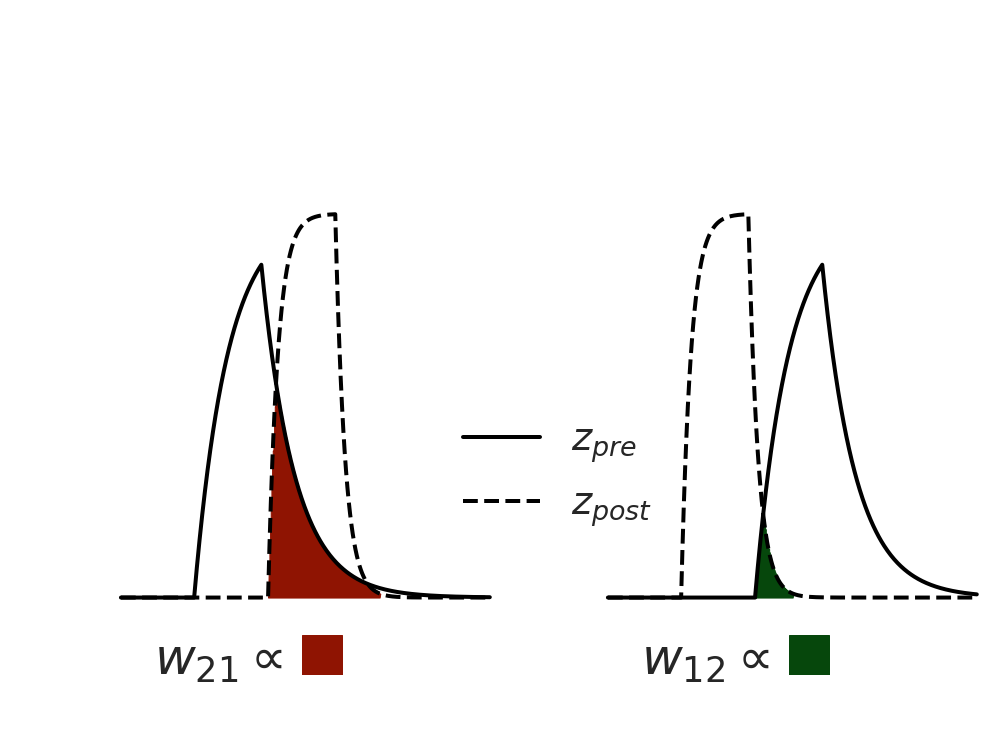

In [132]:
save = True

o_set = timed_input.O.T
z_set = timed_input.z_pre.T
z_set_post = timed_input.z_post.T

# Blue and red
color_pre_to_post = 'blue'
color_post_to_pre = 'red'
# Blue and orange
color_pre_to_post = '#0343df'
color_post_to_pre = '#f97306'
# Purple to yellow
color_pre_to_post = '#9a0eea'
color_post_to_pre = '#ffff14'
# chartreuse and magenta
color_pre_to_post = '#c1f80a'
color_post_to_pre = '#c20078'

# Red and green
color_pre_to_post = '#8f1402'
color_post_to_pre = '#06470c'


linewidth = 4
time = np.arange(0, manager.T_training_total, dt)
gs = gridspec.GridSpec(1, 2)

fig = plt.figure(figsize=(16, 12))

#ax_diagram.set_xlim([-1, 1])
#ax_diagram.set_ylim([0, 1])
ax_diagram.set_aspect('equal', adjustable='datalim')
### The traces
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

# Plot the traces at 1
z_pre = z_set[:, 1]
z_post = z_set_post[:, 2]
ax1.plot(time, z_pre, linewidth=linewidth,  ls='-', color='black', label=r'$z_{pre}$')
ax1.plot(time, z_post, linewidth=linewidth, ls='--', color='black', label=r'$z_{post}$')

# Fill the gap
where = (z_post > 0.010)
aux = np.min(np.vstack((z_pre,z_post)), axis=0)
ax1.fill_between(time, aux, where=where, interpolate=True, step='post', color=color_pre_to_post)

# Plot the traces at 2
z_pre = z_set[:, 2]
z_post = z_set_post[:, 1]
ax2.plot(time, z_pre, linewidth=linewidth, ls='-', color='black', label=r'$z_{pre}$')
ax2.plot(time, z_post, linewidth=linewidth, ls='--', color='black', label=r'$z_{post}$')




# Fill the gap
where = (z_post > 0.010)
aux = np.min(np.vstack((z_pre,z_post)), axis=0)
ax2.fill_between(time, aux, where=where, interpolate=True, step='post', color=color_post_to_pre)

x_text = 0.05
ax1.text(x_text, -0.2, s=r'$w_{21} \propto$', fontsize=50)
ax2.text(x_text, -0.2, s=r'$w_{12} \propto $', fontsize=50)
ax1.plot([x_text + 0.25], [-0.15], 's', ms=40, color=color_pre_to_post)
ax2.plot([x_text + 0.25], [-0.15], 's', ms=40, color=color_post_to_pre)

y_lim = 1.5
ax1.set_ylim([-0.20, y_lim])
ax2.set_ylim([-0.20, y_lim])
ax1.legend(frameon=False, loc=(0.85, 0.2))


if True:
    ax1.axis('off')
    ax2.axis('off')
    ax_diagram.axis('off')
    
if save:
    directory = '../plot_producers/'
    file_name = 'association_diagram3' 
    format_string = '.svg'
    string_to_save = directory + file_name + format_string
    fig.savefig(string_to_save, frameon=False, dpi=110, bbox_inches='tight')

#### Depicting the input

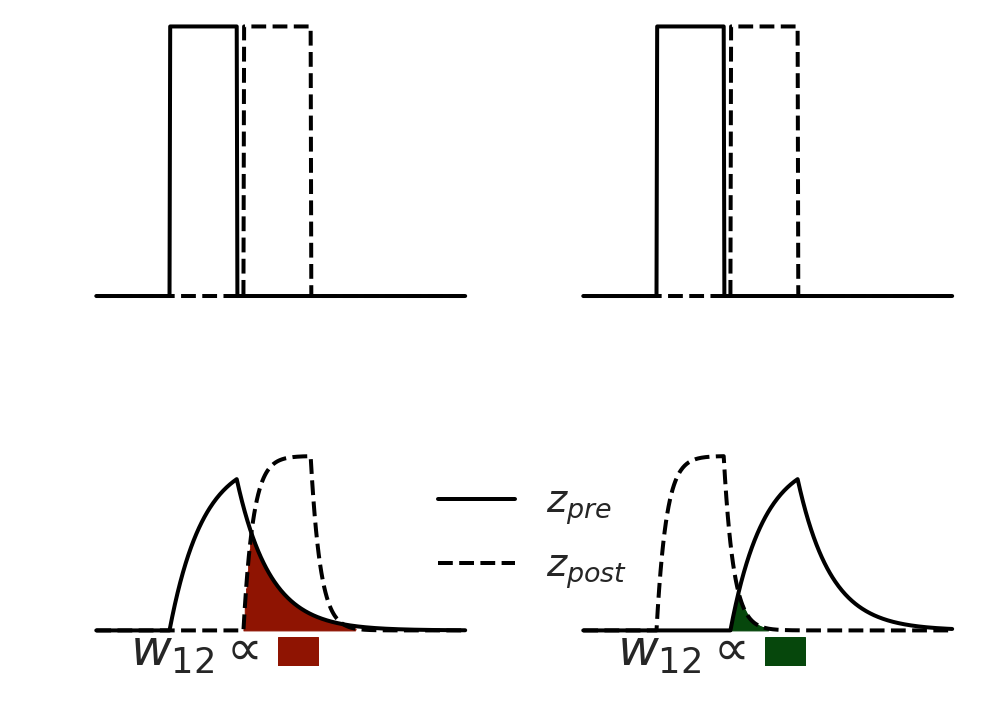

In [129]:
linewidth = 4
time = np.arange(0, manager.T_training_total, dt)
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(16, 12))

ax1_ = fig.add_subplot(gs[0, 0])
# Plot the traces at 1
z_pre = o_set[:, 1]
z_post = o_set[:, 2]
ax1_.plot(time, z_pre, linewidth=linewidth,  ls='-', color='black', label=r'$o_{pre}$')
ax1_.plot(time, z_post, linewidth=linewidth, ls='--', color='black', label=r'$o_{post}$')

ax2_ = fig.add_subplot(gs[0, 1])
# Plot the traces at 1
z_pre = o_set[:, 1]
z_post = o_set[:, 2]
ax2_.plot(time, z_pre, linewidth=linewidth,  ls='-', color='black', label=r'$o_{pre}$')
ax2_.plot(time, z_post, linewidth=linewidth, ls='--', color='black', label=r'$o_{post}$')

ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[1, 1])


# Plot the traces at 1
z_pre = z_set[:, 1]
z_post = z_set_post[:, 2]
ax1.plot(time, z_pre, linewidth=linewidth,  ls='-', color='black', label=r'$z_{pre}$')
ax1.plot(time, z_post, linewidth=linewidth, ls='--', color='black', label=r'$z_{post}$')

# Fill the gap
where = (z_post > 0.010)
aux = np.min(np.vstack((z_pre,z_post)), axis=0)
ax1.fill_between(time, aux, where=where, interpolate=True, step='post', color=color_pre_to_post)

# Plot the traces at 2
z_pre = z_set[:, 2]
z_post = z_set_post[:, 1]
ax2.plot(time, z_pre, linewidth=linewidth, ls='-', color='black', label=r'$z_{pre}$')
ax2.plot(time, z_post, linewidth=linewidth, ls='--', color='black', label=r'$z_{post}$')


# Fill the gap
where = (z_post > 0.010)
aux = np.min(np.vstack((z_pre,z_post)), axis=0)
ax2.fill_between(time, aux, where=where, interpolate=True, step='post', color=color_post_to_pre)

x_text = 0.05
ax1.text(x_text, -0.2, s=r'$w_{21} \propto$', fontsize=50)
ax2.text(x_text, -0.2, s=r'$w_{12} \propto $', fontsize=50)
ax1.plot([x_text + 0.25], [-0.15], 's', ms=40, color=color_pre_to_post)
ax2.plot([x_text + 0.25], [-0.15], 's', ms=40, color=color_post_to_pre)

y_lim = 1.5
ax1.set_ylim([-0.20, y_lim])
ax2.set_ylim([-0.20, y_lim])
ax1.legend(frameon=False, loc=(0.85, 0.2))


if True:
    ax1.axis('off')
    ax2.axis('off')
    ax1_.axis('off')
    ax2_.axis('off')

if save:
    directory = '../plot_producers/'
    file_name = 'association_diagram4' 
    format_string = '.svg'
    string_to_save = directory + file_name + format_string
    fig.savefig(string_to_save, frameon=False, dpi=110, bbox_inches='tight')

In [98]:
y1.shape

(550,)

In [102]:
np.max(np.vstack((y1, y2)), axis=0).shape

(550,)